# Different ML methods

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install tensorflow
!pip install lightgbm==3.3.5

import torch
print(torch.__version__)  # check pytorch version
print(torch.cuda.is_available())  # check disponibility GPU

     - 17.9 MB 17.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390592 sha256=7140693d1616abbc298a2511c5e7aefcc25ba3d2cabc3fab245005b9c718dae9
  Stored in directory: /tmp/pip-ephem-wheel-cache-r_q7nzq2/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e4109ea9e538f6ba69bbdeef9087d0555ee0a13bee54de8041b2138056d62529
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Su

## **Data**


### Combine the two datasets in one


In [ ]:
#import torch.nn as nn
#import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from google.colab import drive
from pandas_profiling import ProfileReport
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

drive.mount('/content/drive')

# read data from google drive
data1 = pd.read_excel('/content/drive/MyDrive/TEST1.5_ALINEADOS.xlsx')
data2 = pd.read_excel('/content/drive/MyDrive/TEST2.0_ALINEADOS.xlsx')
data3 = pd.read_excel('/content/drive/MyDrive/TESTNUEVOMOV1.1_ALINEADOS.xlsx')
data4 = pd.read_excel('/content/drive/MyDrive/TESTNUEVOMOV2.1_ALINEADOS_quitandoultimo.xlsx') #DATOS DE TEST

# combine datasets
data_train = pd.concat([data1, data2, data3], ignore_index=True) #DATOS DE TRAIN
data_test = pd.concat([data4], ignore_index=True) #DATOS DE TEST

# Degrees to radians
data_train['RotationX_rad'] = data_train['RotationX_deg']* (np.pi / 180)
data_train['RotationZ_rad'] = data_train['RotationZ_deg']* (np.pi / 180)
data_test['RotationX_rad'] = data_test['RotationX_deg']* (np.pi / 180)
data_test['RotationZ_rad'] = data_test['RotationZ_deg']* (np.pi / 180)
data_general = pd.concat([data_train, data_test], ignore_index=True)

print(data_train.shape)
print(data_test.shape)

<ipython-input-4-9a6c585c6438>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(42600, 17)
(4366, 17)


In [ ]:
data_train # la columna time no está bien ya que el data2 no continua por donde se llegaba data1

Time  Inclination_deg  Orientation_deg  Pitch_rad       Yaw_rad  \
0        0.00                5               90   0.087266 -5.343530e-18   
1        0.01                5               90   0.087266 -5.343530e-18   
2        0.02                5               90   0.087266 -5.343530e-18   
3        0.03                5               90   0.087266 -5.343530e-18   
4        0.04                5               90   0.087266 -5.343530e-18   
...       ...              ...              ...        ...           ...   
42595  129.95                0                0   0.000000  0.000000e+00   
42596  129.96                0                0   0.000000  0.000000e+00   
42597  129.97                0                0   0.000000  0.000000e+00   
42598  129.98                0                0   0.000000  0.000000e+00   
42599  129.99                0                0   0.000000  0.000000e+00   

       Pitch_deg       Yaw_deg  Motor7_rad  Motor8_rad  RotationX_deg  \
0            5.0 -3.061617e-16    0.000037   -0.001193       0.008419   
1            5.0 -3.061617e-16   -0.001044   -0.002061      -0.003308   
2            5.0 -3.061617e-16   -0.004490   -0.005720      -0.005990   
3            5.0 -3.061617e-16   -0.009364   -0.008991      -0.035353   
4            5.0 -3.061617e-16   -0.013859   -0.013838      -0.095634   
...          ...           ...         ...         ...            ...   
42595        0.0  0.000000e+00    0.000016    0.000048       1.921543   
42596        0.0  0.000000e+00   -0.000016    0.000048       1.917512   
42597        0.0  0.000000e+00    0.000016    0.000048       1.910917   
42598        0.0  0.000000e+00    0.000016    0.000048       1.908000   
42599        0.0  0.000000e+00    0.000000    0.000048       1.909103   

       RotationY_deg  RotationZ_deg  PositionX_cm  PositionY_cm  PositionZ_cm  \
0          -0.013648       0.029721      0.016005      0.039895     -0.107521   
1           0.039036       0.066985      0.011164      0.040308     -0.108233   
2           0.011233       0.096144      0.005485      0.039643     -0.108597   
3          -0.006483       0.147246     -0.000995      0.039561     -0.109620   
4           0.020651       0.200617     -0.006932      0.039068     -0.114155   
...              ...            ...           ...           ...           ...   
42595      -0.178945      -0.533686     -0.100618      0.063819      0.498064   
42596      -0.177305      -0.531754     -0.100632      0.063476      0.497654   
42597      -0.178127      -0.532703     -0.100253      0.063439      0.497215   
42598      -0.178001      -0.534846     -0.099854      0.063594      0.497177   
42599      -0.173076      -0.536407     -0.099709      0.063776      0.497242   

       RotationX_rad  RotationZ_rad  
0           0.000147       0.000519  
1          -0.000058       0.001169  
2          -0.000105       0.001678  
3          -0.000617       0.002570  
4          -0.001669       0.003501  
...              ...            ...  
42595       0.033537      -0.009315  
42596       0.033467      -0.009281  
42597       0.033352      -0.009297  
42598       0.033301      -0.009335  
42599       0.033320      -0.009362  

[42600 rows x 17 columns]

In [ ]:
data_test

Time  Inclination_deg  Orientation_deg  Pitch_rad   Yaw_rad  Pitch_deg  \
0      0.00               23               95   0.399898  0.034987  22.912478   
1      0.01               23               95   0.399898  0.034987  22.912478   
2      0.02               23               95   0.399898  0.034987  22.912478   
3      0.03               23               95   0.399898  0.034987  22.912478   
4      0.04               23               95   0.399898  0.034987  22.912478   
...     ...              ...              ...        ...       ...        ...   
4361  43.61                0                0   0.000000  0.000000   0.000000   
4362  43.62                0                0   0.000000  0.000000   0.000000   
4363  43.63                0                0   0.000000  0.000000   0.000000   
4364  43.64                0                0   0.000000  0.000000   0.000000   
4365  43.65                0                0   0.000000  0.000000   0.000000   

       Yaw_deg  Motor7_rad  Motor8_rad  RotationX_deg  RotationY_deg  \
0     2.004582    0.000144   -0.000016       0.033118      -0.010023   
1     2.004582    0.000128   -0.000048      -0.100112       0.006615   
2     2.004582    0.000016   -0.003404      -0.088640      -0.012722   
3     2.004582   -0.000591   -0.012064       0.022153      -0.033004   
4     2.004582   -0.017417   -0.015595      -0.086601       0.099311   
...        ...         ...         ...            ...            ...   
4361  0.000000    0.000112    0.000032       1.327215      -0.181197   
4362  0.000000    0.000112    0.000032       1.342075      -0.111897   
4363  0.000000    0.000112    0.000032       1.248449      -0.122775   
4364  0.000000    0.000112    0.000032       1.260213      -0.192623   
4365  0.000000    0.000112    0.000032       1.265473      -0.285913   

      RotationZ_deg  PositionX_cm  PositionY_cm  PositionZ_cm  RotationX_rad  \
0         -0.048250     -0.142920      0.076445      0.281050       0.000578   
1          0.021293     -0.142758      0.074627      0.280559      -0.001747   
2          0.082505     -0.146782      0.074891      0.281011      -0.001547   
3          0.157829     -0.158070      0.076105      0.280890       0.000387   
4          0.444665     -0.182718      0.073674      0.279889      -0.001511   
...             ...           ...           ...           ...            ...   
4361      -0.517782     -0.098749      0.066618      0.423270       0.023164   
4362      -0.558040     -0.098830      0.065343      0.421531       0.023424   
4363      -0.474670     -0.102522      0.068555      0.422367       0.021790   
4364      -0.474549     -0.105488      0.068509      0.421878       0.021995   
4365      -0.485389     -0.108108      0.068019      0.420856       0.022087   

      RotationZ_rad  
0         -0.000842  
1          0.000372  
2          0.001440  
3          0.002755  
4          0.007761  
...             ...  
4361      -0.009037  
4362      -0.009740  
4363      -0.008285  
4364      -0.008282  
4365      -0.008472  

[4366 rows x 17 columns]

<Figure size 800x600 with 0 Axes>

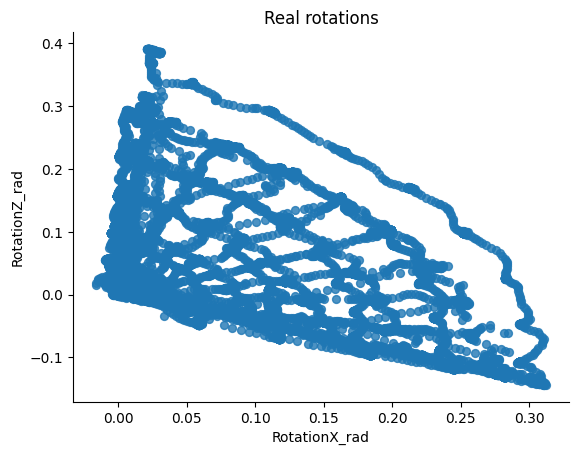

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
data_train.plot(kind='scatter', x='RotationX_rad', y='RotationZ_rad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
_ = plt.title('Real rotations')

#para representar el espacio de trabajo como nicole, hay que obtener de las rotationesX y Z reales las inclinaciones y orinetaciones corresp, y de ahi hacer el bucle que tiene ella.

### Data analysis

In [ ]:
# data analysis
profile = data_general.profile_report(title='Finger Report')
profile.to_file("FingerAnalysis.html")

#aqui se puede hacer lo de promediar los datos para suavizarlos,de momento no lo voy a hacer

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Columns selection

In [ ]:
# DATASET
# select the columns needed
#print(data.columns)
data_a = data_train[['RotationX_rad', 'RotationZ_rad', 'Motor7_rad', 'Motor8_rad']] # inputs, outputs in radians
data_b = data_test[['RotationX_rad', 'RotationZ_rad', 'Motor7_rad', 'Motor8_rad']] # inputs,, outputs in radians

df_train = pd.DataFrame(data_a)
print(df_train.head())
print(df_train.shape)

df_test = pd.DataFrame(data_b)
print(df_test.head())
print(df_test.shape)

   RotationX_rad  RotationZ_rad  Motor7_rad  Motor8_rad
0       0.000147       0.000519    0.000037   -0.001193
1      -0.000058       0.001169   -0.001044   -0.002061
2      -0.000105       0.001678   -0.004490   -0.005720
3      -0.000617       0.002570   -0.009364   -0.008991
4      -0.001669       0.003501   -0.013859   -0.013838
(42600, 4)
   RotationX_rad  RotationZ_rad  Motor7_rad  Motor8_rad
0       0.000578      -0.000842    0.000144   -0.000016
1      -0.001747       0.000372    0.000128   -0.000048
2      -0.001547       0.001440    0.000016   -0.003404
3       0.000387       0.002755   -0.000591   -0.012064
4      -0.001511       0.007761   -0.017417   -0.015595
(4366, 4)


In [ ]:
data_a["Motor8_rad"].describe()

count    42600.000000
mean        -0.155236
std          0.246434
min         -0.758585
25%         -0.323734
50%         -0.122809
75%          0.000016
max          0.364579
Name: Motor8_rad, dtype: float64

### Suffle the data and separate in train and test

In [ ]:
import sklearn.utils
data = sklearn.utils.shuffle(df_train) #aleatorizamos los datos de train

#separate data in train and test
#x = data.iloc[:,:2] # two first columns inputs
#y = data.iloc[:,2:] # two last columns outputs
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #así cuando no tenia datos de test a parte

X_train = data.iloc[:, :2]  # Primeras dos columnas (entradas)
y_train = data.iloc[:, 2:]  # Últimas columnas (salidas)

# Test data (sin división, directamente de data_test)
X_test = df_test.iloc[:, :2]  # Primeras dos columnas de dataframe de test
y_test = df_test.iloc[:, 2:]  # Últimas columnas de dataframe de test
y_test_plot = y_test.copy() # para graficar con time

#normalize the data DE MOMENTO NO VOY A NORMALIZAR NADA PARA VER COMO SALE
#scaler = MinMaxScaler(feature_range=(0, 1))
#X_train = scaler.fit_transform(X_train.astype('float32'))  # Normalizamos los datos de entrenamiento
#X_test = scaler.transform(X_test.astype('float32'))  # Transformamos los datos de prueba usando el mismo escalador

# verify shapes
print('Training dataset (input) shape: ', X_train.shape)
print('Test dataset (input) shape: ', X_test.shape)
print('Training dataset (output) shape: ', y_train.shape)
print('Test dataset (output) shape: ', y_test.shape)

y_test

Training dataset (input) shape:  (42600, 2)
Test dataset (input) shape:  (4366, 2)
Training dataset (output) shape:  (42600, 2)
Test dataset (output) shape:  (4366, 2)


Motor7_rad  Motor8_rad
0       0.000144   -0.000016
1       0.000128   -0.000048
2       0.000016   -0.003404
3      -0.000591   -0.012064
4      -0.017417   -0.015595
...          ...         ...
4361    0.000112    0.000032
4362    0.000112    0.000032
4363    0.000112    0.000032
4364    0.000112    0.000032
4365    0.000112    0.000032

[4366 rows x 2 columns]

## Functions

### Function to calculate the errors

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_errors(y_test, y_pred):
  # Asegurarse de que son arrays bidimensionales
  y_test_array = np.array(y_test)
  y_pred_array = np.array(y_pred)

  # Separar los valores reales y las predicciones para cada motor
  y_test_motor7 = y_test_array[:,0]  # Columna para motor 7
  y_test_motor8 = y_test_array[:,1]  # Columna para motor 8

  y_pred_motor7 = y_pred_array[:,0]  # Predicciones para motor 7
  y_pred_motor8 = y_pred_array[:,1]  # Predicciones para motor 8

  # Funciones para NRMSE y NMAE
  def nrmse(y_true, y_pred):
      nrmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
      return nrmse / (np.max(y_true) - np.min(y_true))

  def nmae(y_true, y_pred):
      mae = np.mean(np.abs(y_true - y_pred))
      return mae / (np.max(y_true) - np.min(y_true))

  # Funcion para RAE
  def rae(y_true, y_pred):
      y_test_mean=np.mean(y_true)
      rae=np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true-y_test_mean))
      return rae

  # Funcion para MSLE
  def msle(y_true, y_pred):
      msle=np.mean((np.log1p(y_true)-np.log1p(y_pred))**2)
      return msle

  # Calcular los errores para el motor 7
  mse_motor7 = mean_squared_error(y_test_motor7, y_pred_motor7)
  r2_motor7 = r2_score(y_test_motor7, y_pred_motor7)
  nrmse_motor7 = nrmse(y_test_motor7, y_pred_motor7)
  nmae_motor7 = nmae(y_test_motor7, y_pred_motor7)
  rae_motor7 = rae(y_test_motor7, y_pred_motor7)
  msle_motor7 = msle(y_test_motor7, y_pred_motor7)

  # Calcular los errores para el motor 8
  mse_motor8 = mean_squared_error(y_test_motor8, y_pred_motor8)
  r2_motor8 = r2_score(y_test_motor8, y_pred_motor8)
  nrmse_motor8 = nrmse(y_test_motor8, y_pred_motor8)
  nmae_motor8 = nmae(y_test_motor8, y_pred_motor8)
  rae_motor8 = rae(y_test_motor8, y_pred_motor8)
  msle_motor8 = msle(y_test_motor8, y_pred_motor8)

  return mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8

### Function to plot the motors vs time




In [ ]:
import plotly.graph_objects as go

def create_scatter_plot(df, motor_pred_col, motor_actual_col, motor_name, title):
    fig = go.Figure()

    # Add predicted data
    fig.add_trace(go.Scatter(
        x=df['time'],
        y=df[motor_pred_col],
        mode='markers',
        marker=dict(size=8, color='blue', opacity=0.8),
        name=f'{motor_name}_pred',
        hovertemplate=f'Time: %{{x}}<br>{motor_name}_pred: %{{y}}'
    ))

    # Add actual data
    fig.add_trace(go.Scatter(
        x=df['time'],
        y=df[motor_actual_col],
        mode='markers',
        marker=dict(size=8, color='red', opacity=0.8),
        name=f'{motor_name}',
        hovertemplate=f'Time: %{{x}}<br>{motor_name}: %{{y}}'
    ))

    # Customize the layout
    fig.update_layout(
        title=title,
        xaxis_title='Time',
        yaxis_title=motor_name,
        showlegend=True,
        legend=dict(x=0.8, y=1),
        margin=dict(l=0, r=0, t=20, b=20),
        plot_bgcolor='white'
    )

    # Remove the top and right spines
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    # Show the plot
    fig.show()

### Function to plot dispersion

In [ ]:
def create_comparison_scatter_plot(df, real_col, pred_col, motor_name, title):
    """
    Crea un gráfico de dispersión para comparar valores reales y predichos.
    """
    fig = go.Figure()

    # Scatter plot para los valores reales
    fig.add_trace(go.Scatter(
        x=df[real_col],
        y=df[real_col],
        mode='markers',
        marker=dict(size=8, color='blue', opacity=0.8),
        name=f'{motor_name}_real',
        hovertemplate=f'{motor_name}_real: %{{x}}'
    ))

    # Scatter plot para los valores predichos
    fig.add_trace(go.Scatter(
        x=df[real_col],
        y=df[pred_col],
        mode='markers',
        marker=dict(size=8, color='red', opacity=0.8),
        name=f'{motor_name}_pred',
        hovertemplate=f'{motor_name}_real: %{{x}}<br>{motor_name}_pred: %{{y}}'
    ))

    # Personalizar el diseño
    fig.update_layout(
        title=title,
        xaxis_title=f'{motor_name}_real',
        yaxis_title=f'{motor_name}_pred',
        showlegend=True,
        legend=dict(x=0.8, y=1),
        margin=dict(l=0, r=0, t=20, b=20),
        plot_bgcolor='white'
    )

    # Configuración de los ejes
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    # Mostrar el gráfico
    fig.show()

### Early Stopping Configuration

In [ ]:
# Configuración de EarlyStopping
early_stopping = EarlyStopping(
    monitor='accuracy',         # Monitoriza la exactitud
    patience=7,                 # Si no hay mejora en 10 épocas, detiene el entrenamiento
    min_delta=0.001,            # Requiere una mejora mínima de 0.001 en accuracy para continuar
    restore_best_weights=True   # Restaura los mejores pesos
)

## **Gradient Boosting (decision tree)**

In [ ]:
#Gradient Boosting (XGBoost, LightGBM): TIENE REGULARIZACION
# Create LightGBM model
model = lgb.LGBMRegressor()

# Create MultiOutputRegressor with the LightGBM model to train with multiple outputs
multi_model = MultiOutputRegressor(model)

# Train the multi-output model
multi_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_model.predict(X_test)

# Calculate errors
mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)

# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Motor 7 Errors:
Mean Squared Error (MSE): 0.00838585282814622
R-squared (R2): 0.8544764961202754
Normalized Root Mean Squared Error (NRMSE): 0.10094993242967326
Normalized Mean Absolute Error (NMAE): 0.051872848219083945
Relative Absolute Error (RAE): 0.2353604046537238
Mean Squared Logarithmic Error (MSLE): 0.007129010905179472

Motor 8 Errors:
Mean Squared Error (MSE): 0.003832438817465908
R-squared (R2): 0.9371836881156945
Normalized Root Mean Squared Error (NRMSE): 0.07557470033019945
Normalized Mean Absolute Error (NMAE): 0.05147553768312562
Relative Absolute Error (RAE): 0.1954826586718335
Mean Squared Logarithmic Error (MSLE): 0.006726737354416788


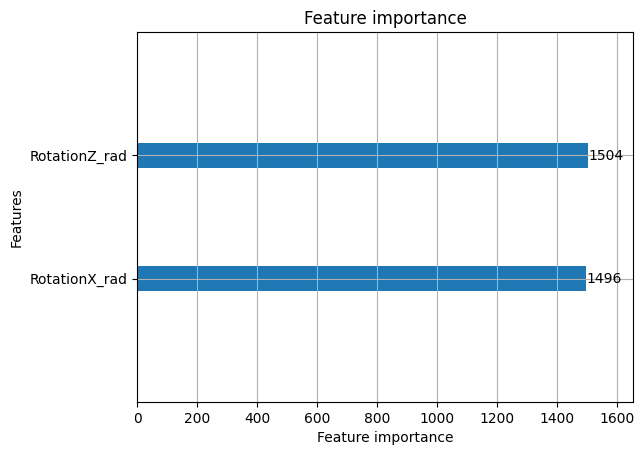

In [ ]:
import matplotlib.pyplot as plt

# Access the first regressor in the MultiOutputRegressor
regressor = multi_model.estimators_[0]

# Plot the feature importances
lgb.plot_importance(regressor)
plt.show()

<Axes: >

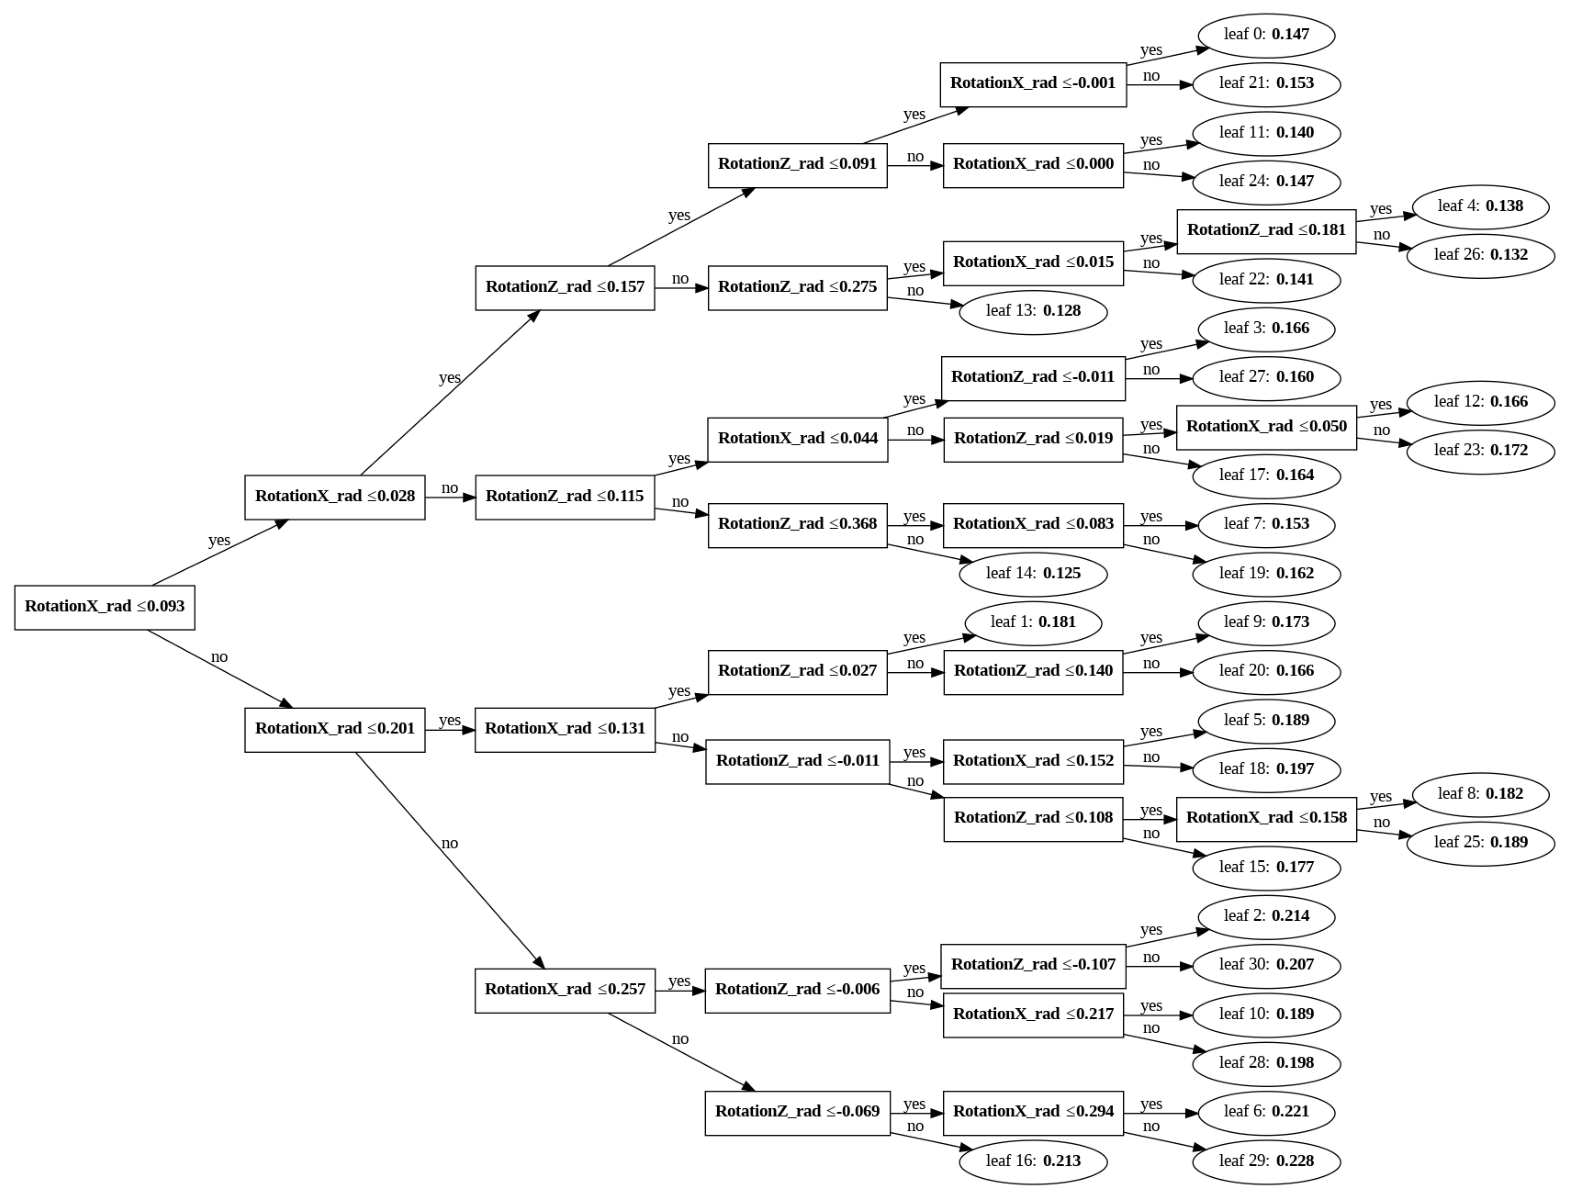

In [ ]:
# @title Plot tree
!pip install graphviz
import graphviz
lgb.plot_tree(multi_model.estimators_[0], figsize=(20, 20))


In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['Motor7_rad_pred', 'Motor8_rad_pred'])
y_test_plot['time'] = y_test.index

combined_df = pd.concat([y_test_plot.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)
combined_df["error"] = abs(combined_df["Motor7_rad"] - combined_df["Motor7_rad_pred"])
combined_df

Motor7_rad  Motor8_rad  time  Motor7_rad_pred  Motor8_rad_pred     error
0       0.000144   -0.000016     0         0.008787        -0.010107  0.008644
1       0.000128   -0.000048     1        -0.009171        -0.004040  0.009298
2       0.000016   -0.003404     2        -0.023384        -0.028231  0.023400
3      -0.000591   -0.012064     3        -0.011662        -0.025465  0.011071
4      -0.017417   -0.015595     4        -0.044659        -0.084646  0.027241
...          ...         ...   ...              ...              ...       ...
4361    0.000112    0.000032  4361         0.069705        -0.002789  0.069593
4362    0.000112    0.000032  4362         0.041734         0.003459  0.041622
4363    0.000112    0.000032  4363         0.029073         0.001362  0.028961
4364    0.000112    0.000032  4364         0.029297         0.000634  0.029185
4365    0.000112    0.000032  4365         0.036036         0.001459  0.035924

[4366 rows x 6 columns]

In [ ]:
# @title Motor7_pred and Motor7 real vs time || Motor8_pred and Motor8 real vs time
# Call the function for Motor7
create_scatter_plot(
    df=combined_df,
    motor_pred_col='Motor7_rad_pred',
    motor_actual_col='Motor7_rad',
    motor_name='Motor7_rad',
    title='Comparation: Motor7_rad_pred vs Motor7_rad with Gradient Boosting'
)

# Call the function for Motor8
create_scatter_plot(
    df=combined_df,
    motor_pred_col='Motor8_rad_pred',
    motor_actual_col='Motor8_rad',
    motor_name='Motor8_rad',
    title='Comparation: Motor8_rad_pred vs Motor8_rad with Gradient Boosting'
)

In [ ]:
# @title Motor7_pred vs Motor7 || Motor8_pred vs Motor8
create_comparison_scatter_plot(combined_df, 'Motor7_rad', 'Motor7_rad_pred', 'Motor7', 'Motor7_pred vs Motor7 Comparison')
create_comparison_scatter_plot(combined_df, 'Motor8_rad', 'Motor8_rad_pred', 'Motor8', 'Motor8_pred vs Motor8 Comparison')

In [ ]:
# @title normal error at each time
import plotly.graph_objects as go

# Create the scatter plot for Motor7_rad_pred
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=combined_df['time'],
    y=combined_df['error'],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    name='Error',
    hovertemplate='Time: %{x}<br>error: %{y}'
))

# Customize the layout
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='error',
    showlegend=True,
    legend=dict(x=0.8, y=1),
    margin=dict(l=0, r=0, t=20, b=20),
    plot_bgcolor='white'
)

# Remove the top and right spines
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# Show the plot
fig.show()

## Decision Tree

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)

# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

Motor 7 Errors:
Mean Squared Error (MSE): 0.012788933408483158
R-squared (R2): 0.778067843709302
Normalized Root Mean Squared Error (NRMSE): 0.12466644562973332
Normalized Mean Absolute Error (NMAE): 0.07293006396435936
Relative Absolute Error (RAE): 0.330902388347333
Mean Squared Logarithmic Error (MSLE): 0.011256881622448736

Motor 8 Errors:
Mean Squared Error (MSE): 0.01045584075568889
R-squared (R2): 0.8286215683525838
Normalized Root Mean Squared Error (NRMSE): 0.12482980690997796
Normalized Mean Absolute Error (NMAE): 0.08233239190437819
Relative Absolute Error (RAE): 0.3126641427886474
Mean Squared Logarithmic Error (MSLE): 0.02192295270617118


## K-Nearest Neighbors (KNN)

Motor 7 Errors:
Mean Squared Error (MSE): 0.007476021165454419
R-squared (R2): 0.8702652172210362
Normalized Root Mean Squared Error (NRMSE): 0.09531640975356885
Normalized Mean Absolute Error (NMAE): 0.04684335046398795
Relative Absolute Error (RAE): 0.21254028454300872
Mean Squared Logarithmic Error (MSLE): 0.005662818700268855

Motor 8 Errors:
Mean Squared Error (MSE): 0.0023041768027657274
R-squared (R2): 0.9622329551565239
Normalized Root Mean Squared Error (NRMSE): 0.05859987891642558
Normalized Mean Absolute Error (NMAE): 0.03793733136978196
Relative Absolute Error (RAE): 0.14407018814900935
Mean Squared Logarithmic Error (MSLE): 0.004877339361033788


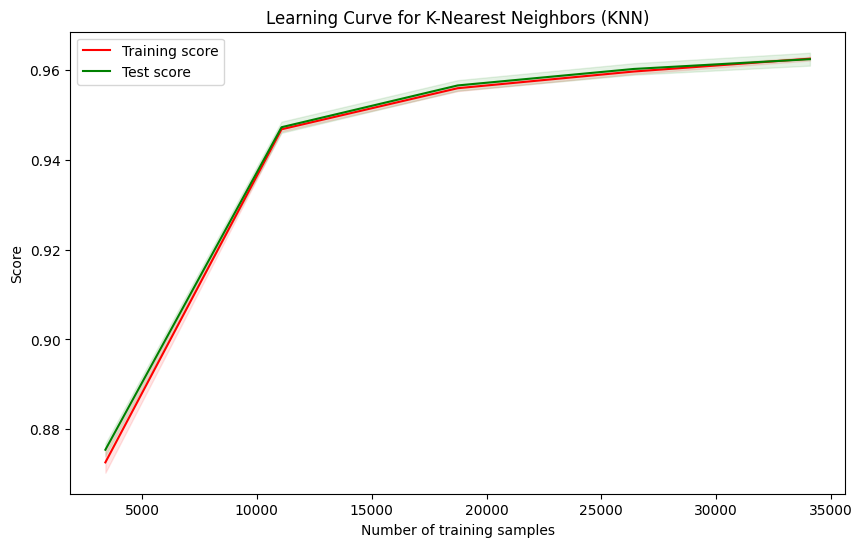

In [ ]:
# K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve, cross_val_score
"""
# Define a range of k values to test
k_values = range(1, 15)  # paso de 10
# Initialize lists to store results
mse_scores = []
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)

    # Validación cruzada para el motor 7
    mse_motor7 = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    r2_motor7 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))

    # Validación cruzada para el motor 8
    mse_motor8 = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    r2_motor8 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))

    mse_scores.append((mse_motor7 + mse_motor8) / 2)  # Promedio de los MSE
    r2_scores.append((r2_motor7 + r2_motor8) / 2)  # Promedio del R²

    print(f"k = {k}, MSE (motor 7, motor 8): {mse_motor7:.4f}, {mse_motor8:.4f}, R2 (motor 7, motor 8): {r2_motor7:.4f}, {r2_motor8:.4f}")

# Encuentra el mejor k basado en el menor MSE o el mayor R²
best_k_mse = k_values[np.argmin(mse_scores)]
best_k_r2 = k_values[np.argmax(r2_scores)]

print(f"\nBest k based on MSE: {best_k_mse}")
print(f"Best k based on R2: {best_k_r2}")
"""

# Initialize the model
model = KNeighborsRegressor(n_neighbors=800) #la mejor K que he encontrado 800, pero el bucle no lo calcula así
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)

# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='r')
plt.plot(train_sizes, test_mean, label='Test score', color='g')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve for K-Nearest Neighbors (KNN)')
plt.legend()
plt.show()


## Random Forest

In [ ]:
#(conjunto de arboles) TIENE REGULARIZACION SE PUEDE PROBAR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)

# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

Motor 7 Errors:
Mean Squared Error (MSE): 0.010278377692226488
R-squared (R2): 0.8216346546231188
Normalized Root Mean Squared Error (NRMSE): 0.11176213785389082
Normalized Mean Absolute Error (NMAE): 0.06391910002409187
Relative Absolute Error (RAE): 0.29001733591404055
Mean Squared Logarithmic Error (MSLE): 0.0085099604440015

Motor 8 Errors:
Mean Squared Error (MSE): 0.006891391949249119
R-squared (R2): 0.88704533937289
Normalized Root Mean Squared Error (NRMSE): 0.10134265881674465
Normalized Mean Absolute Error (NMAE): 0.07490740358735
Relative Absolute Error (RAE): 0.2844671287864842
Mean Squared Logarithmic Error (MSLE): 0.014808256654909016


## Support Vectorial Machine (SVR)

In [ ]:
#SVR
from sklearn.svm import SVR

# Definir el modelo SVR para múltiples salidas
svr = SVR(kernel='rbf')
model = MultiOutputRegressor(svr)  # MultiOutputRegressor maneja múltiples salidas

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir en los datos de test
y_pred = model.predict(X_test)

mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)
# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

Motor 7 Errors:
Mean Squared Error (MSE): 0.008804744504336355
R-squared (R2): 0.847207279057386
Normalized Root Mean Squared Error (NRMSE): 0.10344054344574823
Normalized Mean Absolute Error (NMAE): 0.06476502341400639
Relative Absolute Error (RAE): 0.29385550709977243
Mean Squared Logarithmic Error (MSLE): 0.006436322738912874

Motor 8 Errors:
Mean Squared Error (MSE): 0.0055840978550442885
R-squared (R2): 0.9084727900008899
Normalized Root Mean Squared Error (NRMSE): 0.09122530598107312
Normalized Mean Absolute Error (NMAE): 0.07535763042751971
Relative Absolute Error (RAE): 0.2861769028594347
Mean Squared Logarithmic Error (MSLE): 0.009841707621517178


In [ ]:
# @title Motor7_pred and Motor7 real vs time || Motor8_pred and Motor8 real vs time
import plotly.graph_objects as go

# Crear un DataFrame para las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['Motor7_rad_pred', 'Motor8_rad_pred'])
y_test_plot['time'] = y_test.index

# Combinar los DataFrames de y_test y y_pred
combined_df = pd.concat([y_test_plot.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)# axis=1 to obtain an horizontally concat

# Calcular el error absoluto para Motor7
combined_df["error"] = abs(combined_df["Motor7_rad"] - combined_df["Motor7_rad_pred"])

# Call the function for Motor7
create_scatter_plot( df=combined_df, motor_pred_col='Motor7_rad_pred', motor_actual_col='Motor7_rad', motor_name='Motor7_rad', title='Comparation: Motor7_rad_pred vs Motor7_rad with Gradient Boosting')

# Call the function for Motor8
create_scatter_plot( df=combined_df, motor_pred_col='Motor8_rad_pred', motor_actual_col='Motor8_rad', motor_name='Motor8_rad', title='Comparation: Motor8_rad_pred vs Motor8_rad with Gradient Boosting')

In [ ]:
# @title Motor7 vs Motor7_pred || Motor8 vs Motor8_pred
create_comparison_scatter_plot(combined_df, 'Motor7_rad', 'Motor7_rad_pred', 'Motor7', 'Motor7 vs Motor7_pred Comparison')
create_comparison_scatter_plot(combined_df, 'Motor8_rad', 'Motor8_rad_pred', 'Motor8', 'Motor8 vs Motor8_pred Comparison')

In [ ]:
# @title normal error at each time
import plotly.graph_objects as go

# Create the scatter plot for Motor7_rad_pred
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=combined_df['time'],
    y=combined_df['error'],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    name='Error',
    hovertemplate='Time: %{x}<br>error: %{y}'
))

# Customize the layout
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='error',
    showlegend=True,
    legend=dict(x=0.8, y=1),
    margin=dict(l=0, r=0, t=20, b=20),
    plot_bgcolor='white'
)

# Remove the top and right spines
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

# Show the plot
fig.show()


## **Constant neural network by activation of ELU function and dropout**

In [ ]:
neuronas=64

h_layer_1 = tf.keras.layers.Dense(units=neuronas, input_shape=[2], activation=tf.nn.elu, kernel_regularizer=keras.regularizers.l2(0.01))
dropout_1 = tf.keras.layers.Dropout(rate=0.2)  # Add Dropout layer
h_layer_2 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_2 = tf.keras.layers.Dropout(rate=0.2)  # Add Dropout layer
h_layer_3 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_3 = tf.keras.layers.Dropout(rate=0)  # Add Dropout layer
h_layer_4 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_4 = tf.keras.layers.Dropout(rate=0.2)  # Add Dropout layer
h_layer_5 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_5 = tf.keras.layers.Dropout(rate=0)  # Add Dropout layer
output = tf.keras.layers.Dense(units=2, activation=tf.nn.elu)

# Add the layers to the model, including the Dropout layers
model = tf.keras.Sequential([
    h_layer_1, dropout_1,
    h_layer_2, dropout_2,
    h_layer_3, dropout_3,
    h_layer_4, dropout_4,
    h_layer_5, dropout_5,
    output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# training
print("Initializing training ...")
trained_model_2 = model.fit(X_train, y_train, epochs=15, callbacks=[early_stopping]) #steps_per_epoch=math.ceil(), verbose=False
print("Succesfully trained")

Initializing training ...
Epoch 1/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9352 - loss: 0.0104
Epoch 2/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9604 - loss: 0.0015
Epoch 3/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9602 - loss: 0.0013
Epoch 4/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9614 - loss: 0.0013
Epoch 5/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9577 - loss: 0.0013
Epoch 6/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9584 - loss: 0.0012
Epoch 7/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9600 - loss: 0.0012
Epoch 8/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9600 - loss: 0.0012
Epoch 9/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9585 - loss: 0.0012
Succesfully trained


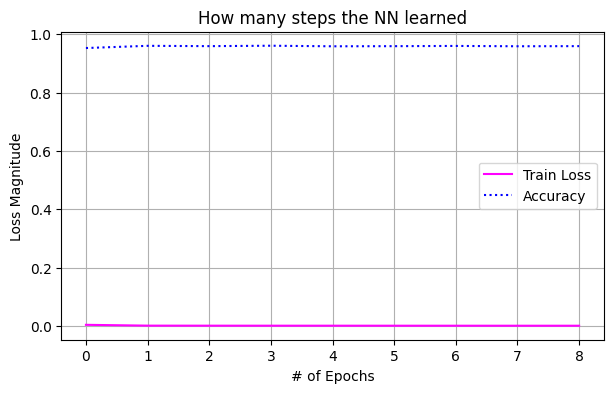

In [ ]:
#Loss Curve (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("How many steps the NN learned")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model_2.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_2.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

In [ ]:
#Test model using testing dataset
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 8.5531e-04
Test Dataset accuracy: 0.82


In [ ]:
# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)

# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

Motor 7 Errors:
Mean Squared Error (MSE): 0.008281916918245358
R-squared (R2): 0.8562801430596702
Normalized Root Mean Squared Error (NRMSE): 0.10032238521864624
Normalized Mean Absolute Error (NMAE): 0.05775557874725114
Relative Absolute Error (RAE): 0.2620518604945632
Mean Squared Logarithmic Error (MSLE): 0.006008420694476612

Motor 8 Errors:
Mean Squared Error (MSE): 0.0038971998293684963
R-squared (R2): 0.936122210525217
Normalized Root Mean Squared Error (NRMSE): 0.07621056055882383
Normalized Mean Absolute Error (NMAE): 0.06127201763736742
Relative Absolute Error (RAE): 0.23268561046748396
Mean Squared Logarithmic Error (MSLE): 0.011843787327338788


In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['Motor7_rad_pred', 'Motor8_rad_pred'])
y_test_plot['time'] = y_test.index

combined_df = pd.concat([y_test_plot.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)
combined_df["error"] = abs(combined_df["Motor7_rad"] - combined_df["Motor7_rad_pred"])
combined_df

Motor7_rad  Motor8_rad  time  Motor7_rad_pred  Motor8_rad_pred     error
0       0.000144   -0.000016     0         0.022736        -0.022773  0.022592
1       0.000128   -0.000048     1         0.016317        -0.025120  0.016189
2       0.000016   -0.003404     2         0.016045        -0.027792  0.016029
3      -0.000591   -0.012064     3         0.019749        -0.031526  0.020341
4      -0.017417   -0.015595     4         0.011697        -0.043108  0.029114
...          ...         ...   ...              ...              ...       ...
4361    0.000112    0.000032  4361         0.082795        -0.008630  0.082683
4362    0.000112    0.000032  4362         0.083919        -0.006936  0.083807
4363    0.000112    0.000032  4363         0.078948        -0.010135  0.078836
4364    0.000112    0.000032  4364         0.079441        -0.010197  0.079330
4365    0.000112    0.000032  4365         0.079797        -0.009749  0.079685

[4366 rows x 6 columns]

In [ ]:
# @title Motor7_pred and Motor7 real vs time || Motor8_pred and Motor8 real vs time
create_scatter_plot(df=combined_df, motor_pred_col='Motor7_rad_pred', motor_actual_col='Motor7_rad', motor_name='Motor7_rad', title='Comparation: Motor7_rad_pred vs Motor7_rad with Gradient Boosting')
create_scatter_plot( df=combined_df, motor_pred_col='Motor8_rad_pred', motor_actual_col='Motor8_rad', motor_name='Motor8_rad', title='Comparation: Motor8_rad_pred vs Motor8_rad with Gradient Boosting')

In [ ]:
# @title Motor7_pred vs Motor7 || Motor8_pred vs Motor8
create_comparison_scatter_plot(combined_df, 'Motor7_rad', 'Motor7_rad_pred', 'Motor7', 'Motor7_pred vs Motor7 Comparison')
create_comparison_scatter_plot(combined_df, 'Motor8_rad', 'Motor8_rad_pred', 'Motor8', 'Motor8_pred vs Motor8 Comparison')

## CONSTANT NEURAL NETWORK PRUEBAS

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Initializing training ...
Epoch 1/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8944 - loss: 0.0036
Epoch 2/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.0013
Epoch 3/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.0013
Epoch 4/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9463 - loss: 0.0012
Epoch 5/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9480 - loss: 0.0012
Epoch 6/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9467 - loss: 0.0012
Epoch 7/15
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9471 - loss: 0.0012
Succesfully trained
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8381 - loss: 3.9824e-04
Test Dataset accuracy: 0.82
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Motor 7 Errors:
Mean Squared Error (MSE): 0.007389608804830318
R-squared (R2): 0.8717647700696541
Normalized Root Mean Squared Error (NRMSE): 0.09476394641794508
Normalized Mean Absolute Err

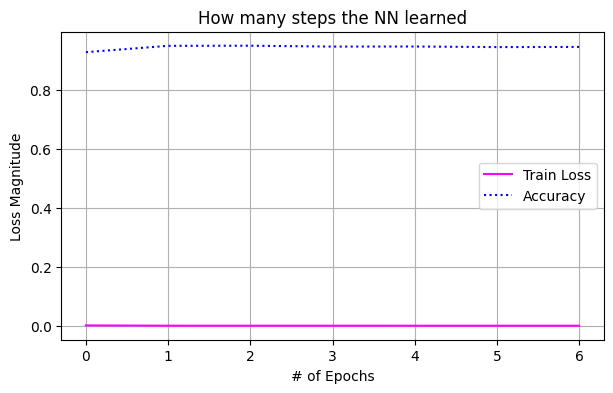

In [ ]:
neuronas = 10

h_layer_1 = tf.keras.layers.Dense(units=neuronas, input_shape=[2], activation=tf.nn.elu)
dropout_1 = tf.keras.layers.Dropout(rate=0.0)  # Add Dropout layer
h_layer_2 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_2 = tf.keras.layers.Dropout(rate=0)  # Add Dropout layer
h_layer_3 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_3 = tf.keras.layers.Dropout(rate=0.0)  # Add Dropout layer
h_layer_4 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_4 = tf.keras.layers.Dropout(rate=0.0)  # Add Dropout layer
h_layer_5 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_5 = tf.keras.layers.Dropout(rate=0.2)  # Add Dropout layer
h_layer_6 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_6 = tf.keras.layers.Dropout(rate=0)  # Add Dropout layer
h_layer_7 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_7 = tf.keras.layers.Dropout(rate=0.0)  # Add Dropout layer
h_layer_8 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.elu)
dropout_8 = tf.keras.layers.Dropout(rate=0.2)  # Add Dropout layer
output = tf.keras.layers.Dense(units=2, activation=tf.nn.elu)

# Add the layers to the model, including the Dropout layers
model = tf.keras.Sequential([
    h_layer_1, dropout_1,
    h_layer_2, dropout_2,
    h_layer_3, dropout_3,
    h_layer_4, dropout_4,
    h_layer_5, dropout_5,
    h_layer_6, dropout_6,
    h_layer_7, dropout_7,
    h_layer_8, dropout_8,
    output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

# training
print("Initializing training ...")
trained_model_2 = model.fit(X_train, y_train, epochs=15, callbacks=[early_stopping]) #steps_per_epoch=math.ceil(), verbose=False
print("Succesfully trained")

#Loss Curve (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("How many steps the NN learned")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model_2.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_2.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

#Test model using testing dataset
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))

y_pred = model.predict(X_test)
mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)

# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

## Simple neural network with ELU and dropout

Initializing training ...
Epoch 1/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6636 - loss: 0.0526
Epoch 2/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9384 - loss: 0.0172
Epoch 3/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9563 - loss: 0.0076
Epoch 4/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9606 - loss: 0.0039
Epoch 5/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9633 - loss: 0.0025
Epoch 6/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9623 - loss: 0.0020
Epoch 7/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9626 - loss: 0.0018
Epoch 8/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.0016
Epoch 9/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9626 - loss: 0.0015
Epoch 10/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9634 - loss: 0.0014
Epoch 11/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9625 - loss: 0.0014
Epoc

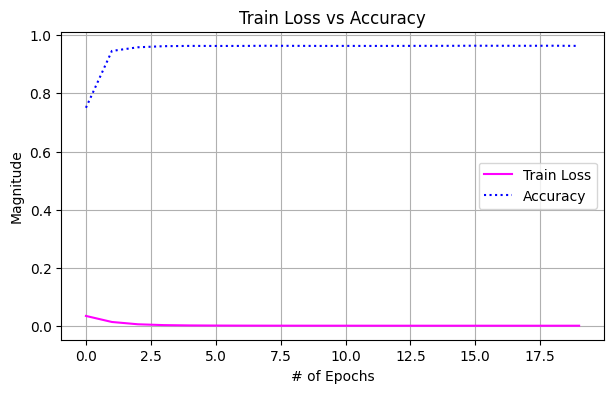

In [ ]:
#RED NEURONAL ELU
model = keras.Sequential()

# Primera capa densa con Dropout después
model.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())    # Batch Normalization antes de la activación
model.add(layers.Activation('elu'))
#model.add(layers.Dropout(0.2))  # Apaga el 20% de las neuronas en esta capa, usar dropout y batch es redundante solo  1

# Segunda capa densa con Dropout después
model.add(layers.Dense(32))
#model.add(layers.BatchNormalization())    #No va nada bien para la salida del motor 8 ponerlo aqui
model.add(layers.Activation('elu'))
#model.add(layers.Dropout(0.2))  # Apaga el 20% de las neuronas en esta capa

# Capa de salida (sin Dropout)
model.add(layers.Dense(y_train.shape[1]))  # Sin activación problema de regresión

# Compile the model
model.compile( optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

# training
print("Initializing training ...")
trained_model_2 = model.fit(X_train, y_train, epochs=20)
print("Succesfully trained")

#Train Loss Curve vs Accuracy (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("Train Loss vs Accuracy")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Magnitude')
plt.plot(trained_model_2.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_2.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

#Test model using testing dataset
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))
y_pred = model.predict(X_test)

mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)
# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')

## ALTERNADAS PRUEBAS

Initializing training ...
Epoch 1/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7966 - loss: 0.0390
Epoch 2/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9622 - loss: 0.0086
Epoch 3/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9610 - loss: 0.0028
Epoch 4/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9619 - loss: 0.0018
Epoch 5/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9619 - loss: 0.0016
Epoch 6/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.0015
Epoch 7/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9618 - loss: 0.0015
Epoch 8/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9622 - loss: 0.0015
Epoch 9/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9608 - loss: 0.0015
Epoch 10/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9612 - loss: 0.0015
Epoch 11/20
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9614 - loss: 0.0014
Epoc

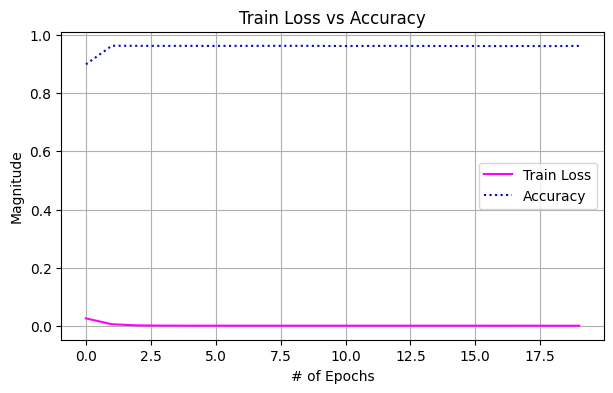

In [ ]:
#RED NEURONAL ELU
model = keras.Sequential()

# Primera capa densa con Dropout después
model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())    # Batch Normalization antes de la activación
model.add(layers.Activation('elu'))
#model.add(layers.Dropout(0.2))  # Apaga el 20% de las neuronas en esta capa, usar dropout y batch es redundante solo  1

# Segunda capa densa con Dropout después
model.add(layers.Dense(64))
#model.add(layers.BatchNormalization())    #No va nada bien para la salida del motor 8 ponerlo aqui
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.2))  # Apaga el 20% de las neuronas en esta capa

model.add(layers.Dense(128))
#model.add(layers.BatchNormalization())    #No va nada bien para la salida del motor 8 ponerlo aqui
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64))
#model.add(layers.BatchNormalization())    #No va nada bien para la salida del motor 8 ponerlo aqui
model.add(layers.Activation('elu'))

# Capa de salida (sin Dropout)
model.add(layers.Dense(y_train.shape[1]))  # Sin activación problema de regresión

# Compile the model
model.compile( optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

# training
print("Initializing training ...")
trained_model_2 = model.fit(X_train, y_train, epochs=20)
print("Succesfully trained")

#Train Loss Curve vs Accuracy (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("Train Loss vs Accuracy")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Magnitude')
plt.plot(trained_model_2.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_2.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

#Test model using testing dataset
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))
y_pred = model.predict(X_test)

mse_motor7, r2_motor7, nrmse_motor7, nmae_motor7, rae_motor7, msle_motor7, mse_motor8, r2_motor8, nrmse_motor8, nmae_motor8, rae_motor8, msle_motor8 = calculate_errors(y_test, y_pred)
# Imprimir los errores para el motor 7
print("Motor 7 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor7}')
print(f'R-squared (R2): {r2_motor7}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor7}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor7}')
print(f'Relative Absolute Error (RAE): {rae_motor7}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor7}')

# Imprimir los errores para el motor 8
print("\nMotor 8 Errors:")
print(f'Mean Squared Error (MSE): {mse_motor8}')
print(f'R-squared (R2): {r2_motor8}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse_motor8}')
print(f'Normalized Mean Absolute Error (NMAE): {nmae_motor8}')
print(f'Relative Absolute Error (RAE): {rae_motor8}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle_motor8}')